# **Drug Discovery [Part 7] using Deep Neural Network**

In **Part 7**, we will be building a regression model of acetylcholinesterase inhibitors using the neural network.


---

## **1. Import libraries**

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split




## **2. Load the data set**

In [2]:
df = pd.read_csv('/content/A10.coronavirus_Descriptor_IWSSR_Scaled.csv')
X1 = df.drop('Unnamed: 0', axis=1)
X1

,MW,NumHAcceptors,NumHDonors,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP12,PubchemFP14,PubchemFP15,PubchemFP16,...,PubchemFP824,PubchemFP826,PubchemFP827,PubchemFP828,PubchemFP830,PubchemFP831,PubchemFP833,PubchemFP834,PubchemFP835,pIC50
0,-1.046883,-0.111915,-0.983696,0.29767,-0.694808,-0.190117,-1.267304,0.362738,0.713283,-0.658281,...,-0.154303,-0.108465,-0.108465,-0.108465,-0.154303,-0.108465,-0.108465,-0.108465,-0.108465,0.304375
1,0.440308,-1.555624,-0.983696,0.29767,-0.694808,-0.190117,-1.267304,0.362738,-1.401969,-0.658281,...,-0.154303,-0.108465,-0.108465,-0.108465,-0.154303,-0.108465,-0.108465,-0.108465,-0.108465,0.184652
2,0.502323,-0.593151,-0.983696,0.29767,-0.694808,-0.190117,0.789076,0.362738,-1.401969,-0.658281,...,6.480741,-0.108465,-0.108465,-0.108465,-0.154303,-0.108465,-0.108465,-0.108465,-0.108465,0.022115
3,-0.913175,-1.074388,-0.983696,0.29767,-0.694808,-0.190117,0.789076,0.362738,-1.401969,-0.658281,...,-0.154303,-0.108465,-0.108465,-0.108465,-0.154303,-0.108465,-0.108465,-0.108465,-0.108465,0.035278
4,-0.414961,-0.111915,-0.983696,0.29767,-0.694808,-0.190117,0.789076,0.362738,0.713283,-0.658281,...,-0.154303,-0.108465,-0.108465,-0.108465,-0.154303,-0.108465,9.219544,-0.108465,-0.108465,0.879543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,-0.414795,-0.111915,-0.983696,0.29767,1.439246,-0.190117,0.789076,-2.756810,-1.401969,-0.658281,...,-0.154303,-0.108465,-0.108465,-0.108465,-0.154303,-0.108465,-0.108465,-0.108465,-0.108465,-0.178411
82,-0.879749,-1.074388,-0.983696,0.29767,1.439246,-0.190117,0.789076,-2.756810,-1.401969,-0.658281,...,-0.154303,-0.108465,-0.108465,-0.108465,-0.154303,-0.108465,-0.108465,-0.108465,-0.108465,-1.244550
83,-1.102022,-1.074388,-0.983696,0.29767,-0.694808,-0.190117,0.789076,-2.756810,-1.401969,-0.658281,...,-0.154303,-0.108465,-0.108465,-0.108465,-0.154303,-0.108465,-0.108465,-0.108465,-0.108465,-0.450773
84,-1.079701,-1.074388,-0.983696,0.29767,-0.694808,-0.190117,0.789076,-2.756810,-1.401969,-0.658281,...,-0.154303,-0.108465,-0.108465,-0.108465,-0.154303,-0.108465,-0.108465,-0.108465,-0.108465,-0.006864


## **3. Input features**
The ***Coronavirus*** data set contains 471 input features and 1 output variable (pIC50 values).

### **3.1. Input features**

In [7]:
X = df.drop('pIC50', axis=1)
X = df.drop('Unnamed: 0', axis=1)
X

,MW,NumHAcceptors,NumHDonors,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP12,PubchemFP14,PubchemFP15,PubchemFP16,...,PubchemFP824,PubchemFP826,PubchemFP827,PubchemFP828,PubchemFP830,PubchemFP831,PubchemFP833,PubchemFP834,PubchemFP835,pIC50
0,-1.046883,-0.111915,-0.983696,0.29767,-0.694808,-0.190117,-1.267304,0.362738,0.713283,-0.658281,...,-0.154303,-0.108465,-0.108465,-0.108465,-0.154303,-0.108465,-0.108465,-0.108465,-0.108465,0.304375
1,0.440308,-1.555624,-0.983696,0.29767,-0.694808,-0.190117,-1.267304,0.362738,-1.401969,-0.658281,...,-0.154303,-0.108465,-0.108465,-0.108465,-0.154303,-0.108465,-0.108465,-0.108465,-0.108465,0.184652
2,0.502323,-0.593151,-0.983696,0.29767,-0.694808,-0.190117,0.789076,0.362738,-1.401969,-0.658281,...,6.480741,-0.108465,-0.108465,-0.108465,-0.154303,-0.108465,-0.108465,-0.108465,-0.108465,0.022115
3,-0.913175,-1.074388,-0.983696,0.29767,-0.694808,-0.190117,0.789076,0.362738,-1.401969,-0.658281,...,-0.154303,-0.108465,-0.108465,-0.108465,-0.154303,-0.108465,-0.108465,-0.108465,-0.108465,0.035278
4,-0.414961,-0.111915,-0.983696,0.29767,-0.694808,-0.190117,0.789076,0.362738,0.713283,-0.658281,...,-0.154303,-0.108465,-0.108465,-0.108465,-0.154303,-0.108465,9.219544,-0.108465,-0.108465,0.879543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,-0.414795,-0.111915,-0.983696,0.29767,1.439246,-0.190117,0.789076,-2.756810,-1.401969,-0.658281,...,-0.154303,-0.108465,-0.108465,-0.108465,-0.154303,-0.108465,-0.108465,-0.108465,-0.108465,-0.178411
82,-0.879749,-1.074388,-0.983696,0.29767,1.439246,-0.190117,0.789076,-2.756810,-1.401969,-0.658281,...,-0.154303,-0.108465,-0.108465,-0.108465,-0.154303,-0.108465,-0.108465,-0.108465,-0.108465,-1.244550
83,-1.102022,-1.074388,-0.983696,0.29767,-0.694808,-0.190117,0.789076,-2.756810,-1.401969,-0.658281,...,-0.154303,-0.108465,-0.108465,-0.108465,-0.154303,-0.108465,-0.108465,-0.108465,-0.108465,-0.450773
84,-1.079701,-1.074388,-0.983696,0.29767,-0.694808,-0.190117,0.789076,-2.756810,-1.401969,-0.658281,...,-0.154303,-0.108465,-0.108465,-0.108465,-0.154303,-0.108465,-0.108465,-0.108465,-0.108465,-0.006864


### **3.2. Output features**

In [4]:
Y = df.pIC50
Y

0     0.304375
1     0.184652
2     0.022115
3     0.035278
4     0.879543
        ...   
81   -0.178411
82   -1.244550
83   -0.450773
84   -0.006864
85   -0.178411
Name: pIC50, Length: 86, dtype: float64

### **3.3. Let's examine the data dimension**

In [11]:
X.shape

(86, 472)

In [12]:
Y.shape

(86,)

## **4. Data split (80/20 ratio)**

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [14]:
X_train.shape, Y_train.shape

((68, 472), (68,))

In [15]:
X_test.shape, Y_test.shape

((18, 472), (18,))

**5. Building a Neural network Model **

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from sklearn.metrics import r2_score,mean_squared_error


In [34]:
model=Sequential([
    Dense(1000, activation = 'relu', input_dim =472),
    Dense(500, activation='relu'),
    Dense(250, activation='relu'),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(1, activation='linear'),])
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,loss=MeanSquaredError())

In [35]:
history = model.fit(X_train, Y_train, epochs = 100, validation_split = 0.2)


Epoch 1/100
2/2 [==============================] - 2s 258ms/step - loss: 0.9919 - val_loss: 0.6769
Epoch 2/100
2/2 [==============================] - 0s 81ms/step - loss: 0.6955 - val_loss: 0.4889
Epoch 3/100
2/2 [==============================] - 0s 72ms/step - loss: 0.4666 - val_loss: 0.3712
Epoch 4/100
2/2 [==============================] - 0s 58ms/step - loss: 0.3128 - val_loss: 0.2971
Epoch 5/100
2/2 [==============================] - 0s 59ms/step - loss: 0.2204 - val_loss: 0.2583
Epoch 6/100
2/2 [==============================] - 0s 56ms/step - loss: 0.1520 - val_loss: 0.2548
Epoch 7/100
2/2 [==============================] - 0s 73ms/step - loss: 0.1025 - val_loss: 0.2805
Epoch 8/100
2/2 [==============================] - 0s 75ms/step - loss: 0.0808 - val_loss: 0.3217
Epoch 9/100
2/2 [==============================] - 0s 56ms/step - loss: 0.0622 - val_loss: 0.3642
Epoch 10/100
2/2 [==============================] - 0s 74ms/step - loss: 0.0525 - val_loss: 0.3922
Epoch 11/100
2/2 [

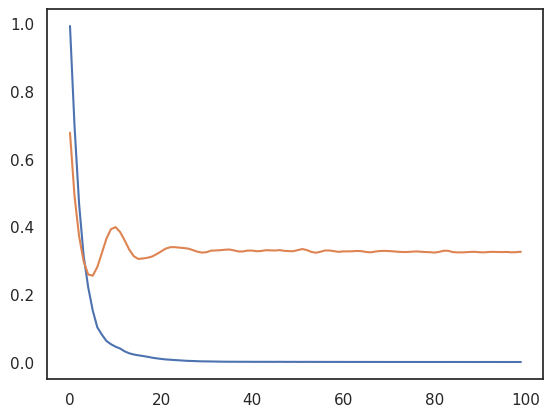

In [36]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


In [37]:
Y_pred = model.predict(X_test)
print("R2 Score:",r2_score(Y_test, Y_pred))
print("MSE Score:",mean_squared_error(Y_test, Y_pred))

1/1 [==============================] - 0s 89ms/step
R2 Score: 0.6956149773259229
MSE Score: 0.34490212693384126


## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

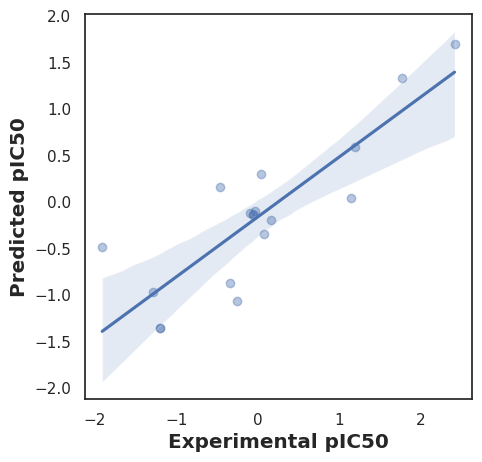

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.figure.set_size_inches(5, 5)
plt.show()